In [452]:
import numpy as np
import math
import sys
# import myenv
sys.path.append('../src/features/')
sys.path.append('../src/data/')
import data_preprocessing_from_yahoo_finance as dp
import myenv
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

In [453]:
result_np = dp.data_preprocessing_1(ticker_list_input=['AAPL', 'PG', 'MS', 'HSBC'], path='../data/raw/')
c = myenv.myenv(result_np)

working on AAPL
working on PG
working on MS
working on HSBC


# Agent

In [445]:
class Agent:
    def __init__(self, name, mode, sess, env=c, reuse=True, lr=0.01):
        self.gamma = 0.99
        self.sess = sess
        self.lr = lr
        self.actor_params = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='network')+tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='output/new_weight')
            
        self.critic_params = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='network')+tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='output/state_value')
        
        #############################################################
        # Inputs
        with tf.name_scope('Inputs'):
            self.price_tensor = tf.placeholder(dtype=tf.float64,
                              shape=[None]+env.observation_space_dimension['price_tensor'], name='price_tensor')
            self.weight = tf.placeholder(dtype=tf.float64,
                        shape=[None]+env.observation_space_dimension['weight'], name='weight')

        
        with tf.variable_scope('network', reuse=tf.AUTO_REUSE):
            # Conv Layers
            conv1 = tf.layers.conv2d(inputs=self.price_tensor,
                         filters=32,
                         kernel_size=[100,3],  # WRONG!
                         strides=2,
                         padding='same', name='conv1')
            conv2 = tf.layers.conv2d(inputs=conv1,
                         filters=24,
                         kernel_size=[10,3],
                         strides=2,
                         padding='same', name='conv2')
            F = tf.reshape(conv2, [-1,np.prod(conv2.shape[1:])]) # Flatten

            # Dense Layer
            dense1 = tf.layers.dense(inputs=F, units=100,
                        activation=tf.nn.relu)
            dense2 = tf.layers.dense(inputs=dense1, units=50,
                        activation=tf.nn.relu)
            # Concat weight tensor
            concat = tf.concat([dense2, self.weight], 1)

            dense3 = tf.layers.dense(inputs=concat, units=100,
                        activation=tf.nn.relu)

            logits = tf.layers.dense(dense3, units=env.action_space_dimension)
        
        with tf.variable_scope('output', reuse=tf.AUTO_REUSE):
            new_weight = tf.nn.softmax(logits, name='new_weight') # Actor output
        
            state_value = dense2 = tf.layers.dense(inputs=dense2, units=1, # Critic Output
                        activation='linear', name='state_value')
        
        self.output = tf.concat([new_weight, state_value], 1)
        self.init = tf.global_variables_initializer()
    ########################################################
#     # Critic related
#     with tf.variable_scope('next_state_value'):
#         self.next_state_value = self.sess.run(state_value, feed_dict={self.price_tensor:S_[0], self.weight:S_[1]})    
    
#     with tf.variable_scope('target_state_value'):
#         self.target_q = R + self.gamma * self.q_
    
#     with tf.variable_scope('TD_error'):
#         self.critic_loss = tf.reduce_mean(tf.squared_difference(self.target_q, self.q_))
        
#     with tf.variable_scope('C_train'):
#         self.critic_train_op = tf.train.AdadeltaOptimizer(self.lr).minimize(self.critic_loss)

# #     def critic_learn(self, S, A, R, S_):
# #         self.sess.run(self.critic_train_op, feed_dict{})
            

    
    
    
    
    
    
    
    
    
    
    def add_actor_grad_to_graph(self, actor_grads):
        with tf.variable_scope('policy_grads'):
            self.policy_grads = tf.gradients(ys=self.new_weight, xs=self.actor_params, grad_ys=actor_grads)

        with tf.variable_scope('actor_training'):
            opt = tf.train.AdamOptimizer(-self.lr)
            self.actor_train_op = opt.apply_gradients(zip(self.policy_grads, self.actor_params))
    
    def actor_learn(self, s):
        self.sess.run(self.actor_train_op, feed_dict={S: s})
    
    def make_prediction(self):
        return self.output
    
        
    
#     with tf.variable_scope('target_q'):
#         self.target_q = R + self.gamma*self.state_value
    
#     self.q_loss = ][]

In [444]:
with tf.Session() as sess:
    a = Agent(env=c, mode='test', name='test', sess=sess)
    sess.run(a.init)
    testing=sess.run(a.make_prediction(),
                     {a.price_tensor:np.array([c.reset()[0]]), 
                      a.weight:np.array([c.reset()[1]])})
# print(testing,
# testing[0][:-1],
# testing[0][-1])

ValueError: Trying to share variable network/conv1/kernel, but specified shape (100, 3, 6, 32) and found shape (100, 3, 5, 32).

In [210]:
current_price, last_weight, reward, done = c.reset()
c.current_step

next_price, current_weight, reward, done = c.step(testing[0][:-1])
# c.current_step
# print(c.current_step)
# c.all_prices_normalized[:,c.current_step:c.current_step+c.price_window,:] == price_tensor

In [211]:
c.all_prices_normalized[:,c.current_step-1:c.current_step+c.price_window-1,:] == current_price

array([[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        ...,
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        ...,
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        ...,
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        ..

In [24]:
def evaluate(sess, agent, env, n_episodes=1):
    rewards = []
    for _ in tqdm(range(n_episodes)):
        price_tensor, weight, _, _ = env.reset()
        total_reward = 0
        while True:
            output = sess.run(agent.make_prediction(),
                     {agent.price_tensor:np.array([price_tensor]), 
                      agent.weight:np.array([weight])})
            action, state_value = output[0][0:-1], output[0][-1]
            price_tensor, weight, reward, done = env.step(action)
            total_reward += reward
            if done: break
        rewards.append(total_reward)
    return rewards

In [25]:
a = Agent(env=c, mode='test', name='test')
with tf.Session() as sess:
    sess.run(a.init)
    G = evaluate(sess, a, c, 1)

100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


In [477]:
price_tensor, weight, reward, done = c.reset()
c.action_space_dimension
# type(c.current_step+c.price_window)
# c.all_prices[3,c.current_step+c.price_window,:]
n=0
G = []
while not done:
#     print(c.current_step)
    _,_,r,done = c.step(np.array([0.6-n,0.1+n/4,0.1+n/4,0.1+n/4,0.1+n/4]))
    G.append(r)
    n+=0.001

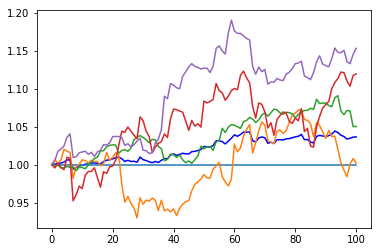

In [478]:
plt.plot(c.portfolio_size, color='blue')
# plt.plot(c.all_prices[3,-101:,:]/np.max(c.all_prices[3,-101:,:], axis=0))
plt.plot(c.all_prices[3,-101:,:]/c.all_prices[3,-101,:])

In [ ]:
def target_train(agent):
    agent.

# Memory 

In [427]:
class memory(): # https://github.com/MorvanZhou/Reinforcement-learning-with-tensorflow/blob/master/contents/9_Deep_Deterministic_Policy_Gradient_DDPG/DDPG.py
    def __init__(self, capacity, env):
        self.capacity = capacity
        self.env = env
        self.pointer = 0
        dim = 1+1+1+1# S,A,R,S_
        self.data = np.zeros(([capacity]+[dim])) # state, action, reward, next_state

    def store_transition(self, state_number, action_number, r, next_state_number):
        transition = [state_number, action_number, r, next_state_number]
        index = self.pointer % self.capacity
        self.data[index, :] = transition
        self.pointer += 1
        
    def sample(self, n):
        assert self.pointer >= self.capacity, 'Please fill the memory'
        indices = np.random.choice(self.capacity, size = n)
        sampled_data = self.data[indices, :]
        
        S=[]
        A=[]
        R=[]
        S_=[]
        for row in sampled_data:
            s = [self.env.all_prices_normalized[:,int(row[0]):int(row[0]+self.env.price_window),:], self.env.weights[int(row[0])] ]
            S.append(s) # current step -1
            A.append(self.env.weights[int(row[1]-1)])
            R.append(row[2])
            s_ = [self.env.all_prices_normalized[:,int(row[3]):int(row[3]+self.env.price_window),:], self.env.weights[int(row[3])] ]
            S_.append(s_)
        
        S = np.array(S)
        S_ = np.array(S_)
        
        result_S = [np.stack(S[:,0], axis=0), np.stack(S[:,1], axis=0)]
        result_A = A
        result_R = R
        result_S_ = [np.stack(S_[:,0], axis=0), np.stack(S_[:,1], axis=0)]
        return result_S, result_A, result_R, result_S_

In [484]:
# memory must be stored AFTER finishing the step, so the env.current_step is updated before saving memory
a = Agent(env=c, mode='test', name='test', sess=sess)
M = memory(capacity=5, env=c)

sess = tf.Session()
sess.run(a.init)

price_tensor = c.reset()[0]
current_weight = c.reset()[1]

while True:
# for _ in tqdm(range(5)):
    S_number = c.current_step
    weight_number = c.current_step
    testing=sess.run(a.make_prediction(),
                     {a.price_tensor:[price_tensor], 
                      a.weight:[current_weight]})
    price_tensor, current_weight, reward, done = c.step(testing[0][:-1])
    M.store_transition(S_number, weight_number, reward, S_number+1) # use current step to store data in memory
    if done: break

In [485]:
S, A, R, S_ = M.sample(10)
# S = np.array(S)
# A = np.array(A)
# R = np.array(R)
# S_ = np.array(S_)

In [486]:
S_[0]

array([[[[1.        , 0.9699183 , 0.98834605, 0.96189815, 0.96313608],
         [1.        , 1.03150568, 1.00181399, 1.06925877, 1.02995418],
         [1.        , 0.97167789, 0.9987929 , 0.98204543, 1.01306047],
         ...,
         [1.        , 0.98990658, 1.00889224, 1.00824175, 1.00183861],
         [1.        , 0.9867005 , 0.99978765, 1.0018864 , 1.00020388],
         [1.        , 0.97265719, 0.98300586, 1.00481171, 0.9979613 ]],

        [[1.        , 0.9830374 , 0.98954136, 1.01369536, 0.98333333],
         [1.        , 1.01500805, 1.00150987, 1.01396841, 1.00854234],
         [1.        , 0.96868825, 1.00105532, 1.        , 1.01250337],
         ...,
         [1.        , 0.99054885, 1.00232929, 1.00625389, 0.99716313],
         [1.        , 0.98445601, 0.99820431, 1.00455772, 0.99857753],
         [1.        , 0.97734276, 0.98412698, 0.99566915, 1.00122103]],

        [[1.        , 1.00197622, 0.99273834, 0.985255  , 0.9815725 ],
         [1.        , 0.99326108, 1.00259065,

In [413]:
np.stack(S_[:,0], axis=0).shape

(10, 4, 2417, 5)